In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input//"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [2]:
# Importando mais Bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime as dt
import re

In [3]:
# Importando Bases de Dados de Jogadores Inscritos na Fifa em 2019
data = pd.read_csv("./input/data.csv")

In [4]:
# Conferindo as primeiras linhas da Base de Dados
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
# Verificando Colunas da Base de Dados
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
# Excluindo algumas colunas
data.drop(['Unnamed: 0','Photo','Flag','Club Logo'], axis = 1, inplace = True)

In [7]:
# Verificação de Campos com valores Nulos
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF            

In [8]:
# Transformando o Salário dos Jogadores em campo numérico
data['Salario'] = (data['Wage'].map(lambda x : re.sub('[^0-9]+', '', x)).astype('float64'))

In [9]:
# Conferindo Novamente as primeiras linhas da Base de Dados
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Salario
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,565.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,405.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,290.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,260.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,355.0


In [10]:
# Contando a quantidade de Países em nossa Base de Dados
data.Nationality.nunique()

164

In [11]:
# Agora vamos identificar os 10 países que tem a maior quantidade de jogadores
data['Nationality'].value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

In [12]:
# Também é possível identificarmos a quantidade de Jogadores em cada Clube
data['Club'].value_counts().head(10)

Atlético Madrid        33
CD Leganés             33
Frosinone              33
Manchester City        33
FC Barcelona           33
Cardiff City           33
Eintracht Frankfurt    33
Valencia CF            33
Liverpool              33
Burnley                33
Name: Club, dtype: int64

In [13]:
# Identificando a média de Idade dos Jogadores
data.Age.mean()

25.122205745043114

In [14]:
# Identificando a média de Idade dos Jogadores por Clube
Club_Id = data.groupby('Club').Age.mean()
print(Club_Id)

Club
 SSV Jahn Regensburg        25.655172
1. FC Heidenheim 1846       24.000000
1. FC Kaiserslautern        23.846154
1. FC Köln                  24.321429
1. FC Magdeburg             24.692308
1. FC Nürnberg              23.793103
1. FC Union Berlin          25.250000
1. FSV Mainz 05             23.687500
AC Ajaccio                  27.043478
AC Horsens                  25.000000
AD Alcorcón                 26.896552
ADO Den Haag                24.678571
AEK Athens                  24.535714
AFC Wimbledon               23.615385
AIK                         26.074074
AJ Auxerre                  25.185185
AS Béziers                  25.769231
AS Monaco                   23.060606
AS Nancy Lorraine           24.933333
AS Saint-Étienne            25.416667
AZ Alkmaar                  23.066667
Aalborg BK                  23.370370
Aarhus GF                   23.777778
Aberdeen                    24.148148
Accrington Stanley          24.821429
Adelaide United             24.360000
Ajax   

In [15]:
# Identificando Quantos Jogadores em cada Idade há
data['Age'].value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

In [16]:
# Identificando a média de Salário dos Jogadores
data.Salario.mean()

9.731312132696216

In [17]:
# Levantamento Estatístico da Base de Dados
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0


In [18]:
# Podemos então verificar quais são os melhores Jogadores por Caracterítica como Chute ou Cabeceio
# Ou mesmo por Posição quem é o melhor Goleiro ou Atacante
# A exemplo disso vamos trazer quais os melhores finalizadores

finaliza = data.sort_values(by='Finishing',ascending = False )
finaliza.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Salario
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,565.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,405.0
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,€83.5M,€205K,2165,...,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M,205.0
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,€64.5M,€300K,2107,...,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M,300.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,2346,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,455.0


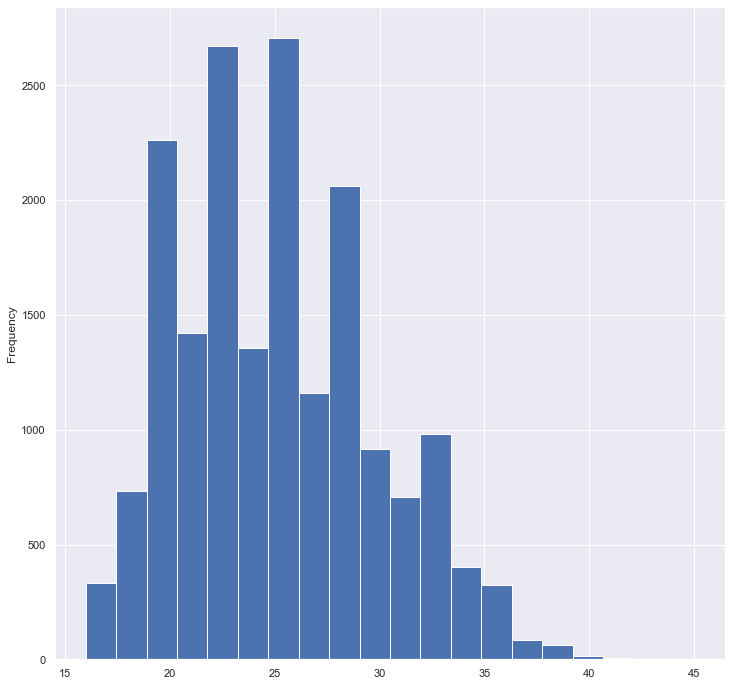

In [19]:
# Gráfico de Barras de Idade de Jogadores
sbn.set(rc={'figure.figsize':(12,12)})
data.Age.plot(kind='hist', bins=20)

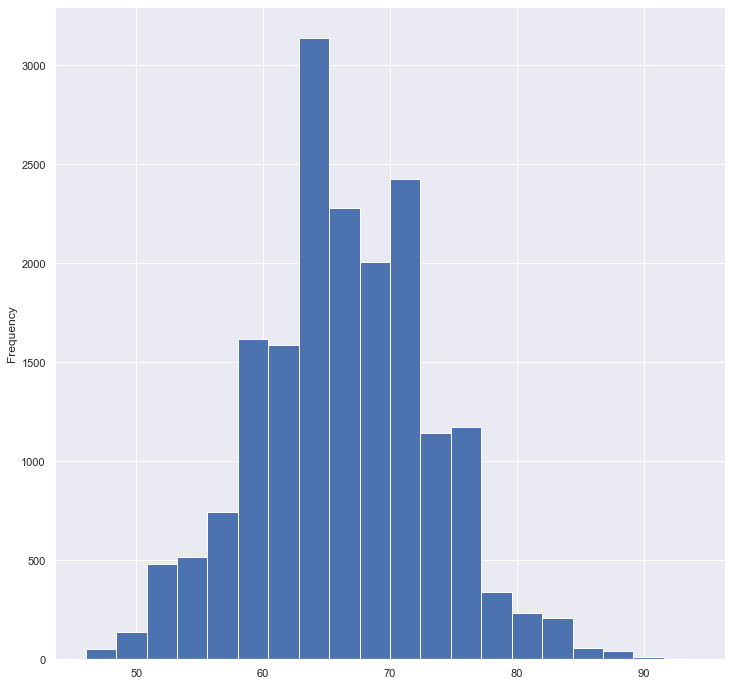

In [20]:
# Gráfico de Barras com as Notas Gerais dos Jogadores 
data.Overall.plot(kind='hist', bins=20)

In [21]:
#Listando os Clubes da Base de Dados
print(data.Club)

0                  FC Barcelona
1                      Juventus
2           Paris Saint-Germain
3             Manchester United
4               Manchester City
5                       Chelsea
6                   Real Madrid
7                  FC Barcelona
8                   Real Madrid
9               Atlético Madrid
10            FC Bayern München
11                  Real Madrid
12              Atlético Madrid
13              Manchester City
14                      Chelsea
15                     Juventus
16            Tottenham Hotspur
17              Atlético Madrid
18                 FC Barcelona
19                  Real Madrid
20                 FC Barcelona
21          Paris Saint-Germain
22            FC Bayern München
23              Manchester City
24                     Juventus
25          Paris Saint-Germain
26                    Liverpool
27                  Real Madrid
28            FC Bayern München
29                       Napoli
                  ...          
18177   

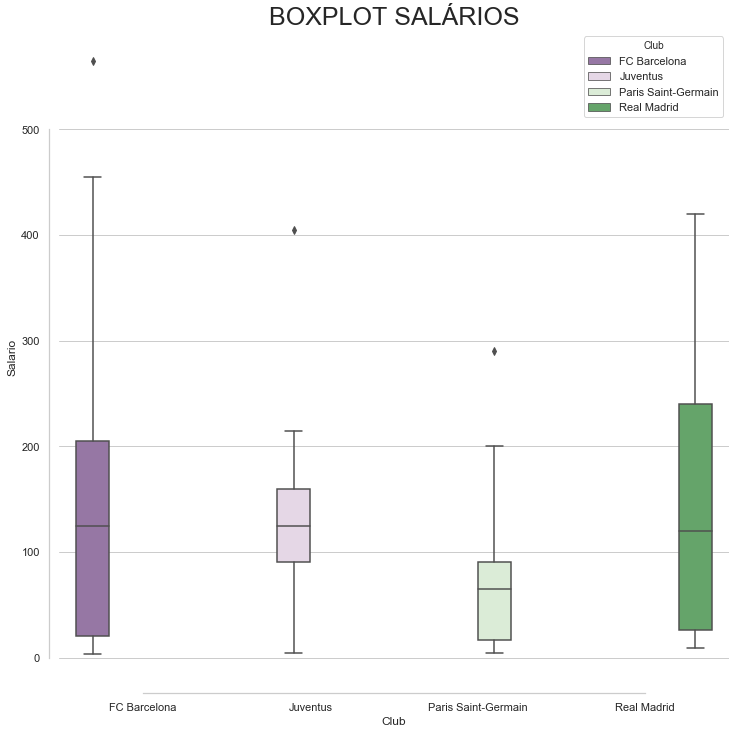

In [22]:
# Gerando BoxPlot de Salários para os Clubes Extrangeiros mais comentados atualmente no Brasil
TopClubs = data[(data.Club == 'FC Barcelona') | (data.Club == 'Juventus') | (data.Club == 'Real Madrid') | (data.Club == 'FC Bayern Munich') | (data.Club == 'Paris Saint-Germain') ]
sbn.set(style="whitegrid", color_codes=True)
sbn.boxplot(x="Club", y="Salario", hue="Club", data=TopClubs, palette="PRGn")
plt.title('BOXPLOT SALÁRIOS', fontsize=25)
sbn.despine(offset=10, trim=True)

Text(0.5, 1.0, 'Clubes e seus Melhores Jogadores')

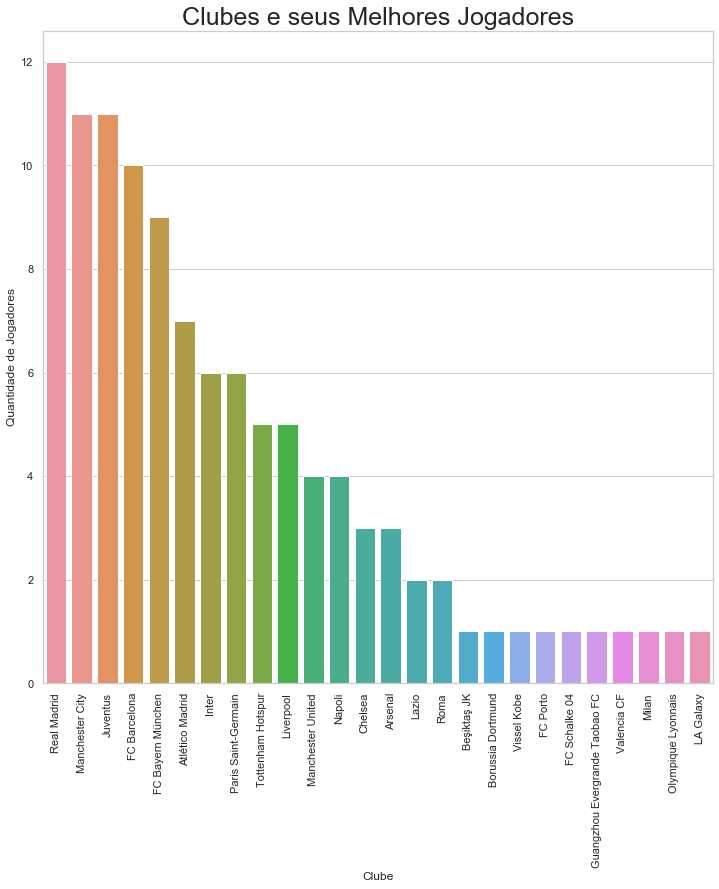

In [23]:
# Através do Gráfico foi possível identificar Salários muito altos, OutLiers
# assim para vamos identificar quais clubes têm a maior quantidade de atletas
# com slários elevados.
# Após alguns testes quanto a apresentação do Gráfico, defino como OutLier
# todos com Overall a partir de 85.

Outlier = data[data['Overall']>= 85]
Agrup = Outlier.groupby('Club')
Count = Agrup.count()['Name'].sort_values(ascending = False)
ax = sbn.countplot(x = 'Club', data = Outlier, order = Count.index)
ax.set_xticklabels(labels = Count.index, rotation='vertical')
ax.set_ylabel('Quantidade de Jogadores')
ax.set_xlabel('Clube')
ax.set_title('Clubes e seus Melhores Jogadores', fontsize=25)

In [24]:
# Gerando matriz de correlação
Analise = data[['Age','Overall','Potential','Salario','Agility','Finishing','Acceleration','BallControl','FKAccuracy','Jumping','LongPassing','LongShots','Dribbling']]

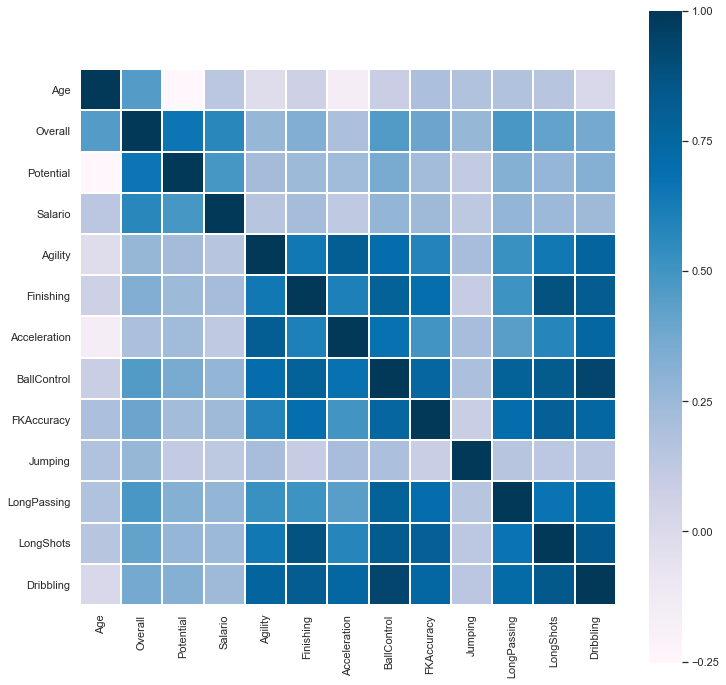

In [25]:
# Criando e Plotando a matriz de correlação
Correlacao = Analise.corr()
ax = sbn.heatmap(Correlacao, xticklabels=Correlacao.columns.values, yticklabels=Correlacao.columns.values,
linewidths=1.0, vmax=1.0, square=True, cmap = 'PuBu', linecolor='white', annot=False)